# MOwNiT 
## Laboratorium
### Znajdowanie pierwiastków

Do poszukiwania pierwiastków funkcji w Julii używamy pakietu Roots

```julia
Pkg.add("Roots")
Pkg.add("ForwardDiff")
```

In [1]:
using Pkg
#Pkg.add("Roots")
#Pkg.add("ForwardDiff")
using Roots  
using Plots
using ForwardDiff

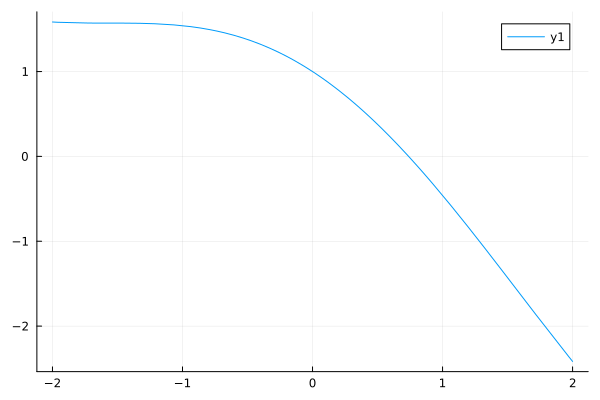

In [2]:
# przykładowa funkcja do testów
f(x) = cos(x) - x
plot(f, -2, 2)

Funkcja <i> find_zero</i>  dobiera odpowiedni algorytm w zależności od sposobu wywołania.


### 1. Metody wykorzytujące  przedział i zmianę znaku

#### 1.1 Metoda bisekcji - jesli wywołamy fzero z podaniem  przedziału (tutaj (0,1))

In [3]:
x = find_zero(f, (0, 1),verbose=true)  

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Bisection()
* iterations: 60
* function evaluations ≈ 63
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 1.118751109680031e-154, 1 )
(a₁, b₁) = ( 1.0795210693868056e-77, 1 )
(a₂, b₂) = ( 3.3060778616876836e-39, 1 )
(a₃, b₃) = ( 5.7598240413292423e-20, 1 )
(a₄, b₄) = ( 2.4010660126805305e-10, 1 )
(a₅, b₅) = ( 1.5497207641601562e-05, 1 )
(a₆, b₆) = ( 0.003936767578125, 1 )
(a₇, b₇) = ( 0.062744140625, 1 )
(a₈, b₈) = ( 0.25048828125, 1 )
(a₉, b₉) = ( 0.50048828125, 1 )
(a₁₀, b₁₀) = ( 0.50048828125, 0.750244140625 )
(a₁₁, b₁₁) = ( 0.6253662109375, 0.750244140625 )
(a₁₂, b₁₂) = ( 0.68780517578125, 0.750244140625 )
(a₁₃, b₁₃) = ( 0.719024658203125, 0.750244140625 )
(a₁₄, b₁₄) = ( 0.7346343994140625, 0.750244140625 )
(a₁₅, b₁₅) = ( 0.7346343994140625, 0.74243927001953125 )
(a₁₆, b₁₆) = ( 0.73853683471679688, 0.74243927001953125 )
(a₁₇, b₁₇) = ( 0.73853683471679688, 0.74048805236816406 )
(a₁₈, b₁₈) = ( 0.73853683

0.7390851332151607

In [4]:
# mozna wyspecyfikowac wprost
x = find_zero(f, (0, 1), Bisection(),verbose=true)  

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Bisection()
* iterations: 60
* function evaluations ≈ 63
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 1.118751109680031e-154, 1 )
(a₁, b₁) = ( 1.0795210693868056e-77, 1 )
(a₂, b₂) = ( 3.3060778616876836e-39, 1 )
(a₃, b₃) = ( 5.7598240413292423e-20, 1 )
(a₄, b₄) = ( 2.4010660126805305e-10, 1 )
(a₅, b₅) = ( 1.5497207641601562e-05, 1 )
(a₆, b₆) = ( 0.003936767578125, 1 )
(a₇, b₇) = ( 0.062744140625, 1 )
(a₈, b₈) = ( 0.25048828125, 1 )
(a₉, b₉) = ( 0.50048828125, 1 )
(a₁₀, b₁₀) = ( 0.50048828125, 0.750244140625 )
(a₁₁, b₁₁) = ( 0.6253662109375, 0.750244140625 )
(a₁₂, b₁₂) = ( 0.68780517578125, 0.750244140625 )
(a₁₃, b₁₃) = ( 0.719024658203125, 0.750244140625 )
(a₁₄, b₁₄) = ( 0.7346343994140625, 0.750244140625 )
(a₁₅, b₁₅) = ( 0.7346343994140625, 0.74243927001953125 )
(a₁₆, b₁₆) = ( 0.73853683471679688, 0.74243927001953125 )
(a₁₇, b₁₇) = ( 0.73853683471679688, 0.74048805236816406 )
(a₁₈, b₁₈) = ( 0.73853683

0.7390851332151607

#### Sprawdzanie, czy znaleźliśmy 0

In [5]:
#Sprawdzamy czy znaleźliśmy 0
iszero(f(x))

true

In [6]:
# można też sprawdzić, czy funkcja zmienia znak dla lewego i prawego sąsiada miejsca zerowego.
sign(f(prevfloat(x))) *sign(f(nextfloat(x))) 

-1.0

In [7]:
# czasem algorytm znajduje najlepsze przybliżenie 0
g(x) = sin(x)
x = find_zero(g, (pi/2, 3pi/2))
x, g(x)

(3.141592653589793, 1.2246467991473532e-16)

In [8]:
# nie jest to dokładnie 0, ale ...
iszero(g(x))

false

In [9]:
#... najbliższy lewy albo prawy sąsiad leży po przeciwnej stronie osi x  niż nasze 0.
g(prevfloat(x)) * g(x) < 0.0 || g(x) * g(nextfloat(x)) < 0.0

true

#### 1.2 Metoda regula falsi

In [10]:
find_zero(f, (0, 1), FalsePosition(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 6
* function evaluations ≈ 8
* stopped as f(x_n) = 0

Trace:
x₁ = 1.118751109680031e-154,	 fx₁ = 1
x₂ = 1,	 fx₂ = -0.45969769413186023
x₃ = 0.68507335732604513,	 fx₃ = 0.089299276481859979
x₄ = 0.73629899761365403,	 fx₄ = 0.0046600390381426049
x₅ = 0.7390895164441823,	 fx₅ = -7.3358319172545094e-06
x₆ = 0.73908513051468816,	 fx₆ = 4.5195431841449363e-09
x₇ = 0.73908513321515801,	 fx₇ = 4.4408920985006262e-15
x₈ = 0.73908513321516067,	 fx₈ = 0



0.7390851332151607

In [11]:
# do dyspozycji mamy  12 wersji algorytmu regula falsi
find_zero(f, (0, 1), FalsePosition(12), verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: FalsePosition{12}()
* iterations: 6
* function evaluations ≈ 8
* stopped as f(x_n) = 0

Trace:
x₁ = 1.118751109680031e-154,	 fx₁ = 1
x₂ = 1,	 fx₂ = -0.45969769413186023
x₃ = 0.68507335732604513,	 fx₃ = 0.089299276481859979
x₄ = 0.73629899761365403,	 fx₄ = 0.0046600390381426049
x₅ = 0.7390895164441823,	 fx₅ = -7.3358319172545094e-06
x₆ = 0.73908513051468816,	 fx₆ = 4.5195431841449363e-09
x₇ = 0.73908513321515801,	 fx₇ = 4.4408920985006262e-15
x₈ = 0.73908513321516067,	 fx₈ = 0



0.7390851332151607

### 2. Metody korzystające z pochodnych

#### 2.1 Metoda Newtona, potrzebuje punktu startowego i wykorzystuje pochodną funkcji.

Aby użyć Metody Newtona, można skorzystać z pakietu ForwardDiff, aby obliczyć pochodną funkcji. 

In [12]:
# definujemy D(f) obliczającą  funkcje pochodną 
D(f) = x->ForwardDiff.derivative(f, float(x))

D (generic function with 1 method)

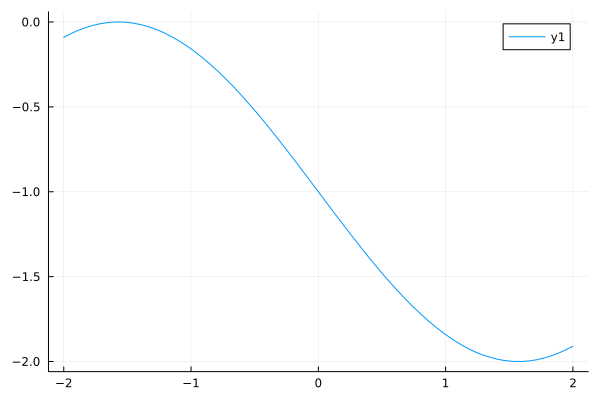

In [13]:
plot(D(f), -2,2)

In [14]:
#wywolanie metody Newtona
find_zero((f, D(f)),0, Roots.Newton(),verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Roots.Newton()
* iterations: 5
* function evaluations ≈ 10
* stopped as f(x_n) = 0

Trace:
x₁ = 0,	 fx₁ = 1
x₂ = 1,	 fx₂ = -0.45969769413186023
x₃ = 0.75036386784024389,	 fx₃ = -0.018923073822117442
x₄ = 0.73911289091136168,	 fx₄ = -4.6455898990771516e-05
x₅ = 0.73908513338528403,	 fx₅ = -2.8472058044570758e-10
x₆ = 0.73908513321516067,	 fx₆ = 0



0.7390851332151607

#### 2.2 Metoda Halleya (potrzebuje pierwszej i drugiej pochodnej)

In [15]:
DD(f) = x->ForwardDiff.derivative(D(f), float(x))
find_zero((f, D(f), DD(f)), 0.0, Roots.Halley(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151606
* Algorithm: Roots.Halley()
* iterations: 4
* function evaluations ≈ 15
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 0,	 fx₁ = 1
x₂ = 0.66666666666666663,	 fx₂ = 0.11922059411028141
x₃ = 0.73903926244631024,	 fx₃ = 7.6769092960393692e-05
x₄ = 0.73908513321514946,	 fx₄ = 1.865174681370263e-14
x₅ = 0.73908513321516056,	 fx₅ = 1.1102230246251565e-16



0.7390851332151606

### 3. Metody korzystające z przybliżenia pochodnej

#### 3.1 Domyślna metoda bazuje na metodzie z <a href="http://www.hpl.hp.com/hpjournal/pdfs/IssuePDFs/1979-12.pdf"> kalkulatorów HP-34</a> , używa metody siecznych
oraz metody bazującej na przedziale wg artykułu:

<a href="http://na.math.kit.edu/alefeld/download/1995_Algorithm_748_Enclosing_Zeros_of_Continuous_Functions.pdf">G. E. Alefeld, F. A. Potra, and
Y. Shi, "Algorithm 748: enclosing zeros of continuous functions," ACM
Trans. Math. Softw. 21, 327–344 (1995), DOI: 10.1145/210089.210111. </a>

In [16]:
x = find_zero(f, 0,   verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Secant(); finished with bracketing method AlefeldPotraShi()
* iterations: 4
* function evaluations ≈ 10
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: Used bracketing method AlefeldPotraShi() on  [0.0,0.9999969722835389]

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 0.99999394452721335
x₂ = 0,	 fx₂ = 1
x₃ = 0.9999969722835389,	 fx₃ = -0.4596921186823234
(a₃, b₃) = ( 0, 0.9999969722835389 )
(a₄, b₄) = ( 0.68507389982090516, 0.9999969722835389 )
(a₅, b₅) = ( 0.73908449070788018, 0.739085775539707 )
(a₆, b₆) = ( 0.73908513321516056, 0.73908513321516078 )



0.7390851332151607

Metody find_zero dla wyzszych rzędów to wariacje metody Newtona, które nie korzystaja z pochodnej, ale ja przyblizają.


#### 3.2 Metoda siecznych

In [17]:
# wywołanie find_zero używając punktu startowego (a nie przedziału) 
# oraz opcji order=1   wykorzystuje metodę siecznych  
x = find_zero(f, 0, Order1(),  verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Secant()
* iterations: 7
* function evaluations ≈ 9
* stopped as f(x_n) = 0

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 0.99999394452721335
x₂ = 0,	 fx₂ = 1
x₃ = 0.9999969722835389,	 fx₃ = -0.4596921186823234
x₄ = 0.68507389982090516,	 fx₄ = 0.089298390734211308
x₅ = 0.73629905416077657,	 fx₅ = 0.0046599445167858633
x₆ = 0.7391193608624661,	 fx₆ = -5.7284235187471388e-05
x₇ = 0.73908511212853889,	 fx₇ = 3.5290823707789798e-08
x₈ = 0.73908513321500136,	 fx₈ = 2.6656454821250009e-13
x₉ = 0.73908513321516067,	 fx₉ = 0



0.7390851332151607

In [18]:
# metoda siecznych może być wywołana bezpośrednio 
# implementacja taka sama jak find_zero(f, 0, Order1()), ale bez
# narzutów frameworku oraz mniejsza ilość sprawdzanych warunków zbieżności - szybsza
Roots.secant_method(f, 0)

0.7390851332151607

In [19]:
# mozemy podać przedział
Roots.secant_method(f, (0,1))

0.7390851332151607

#### 3.3 Metoda Steffensena 
przybliża pochodną poprzez  (f(x + f(x)) - f(x))/f(x)  
aby ja wywołać podajemy punkt startowy oraz order 2

In [20]:
x = find_zero(f, 0, Order2(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Order2()
* iterations: 6
* function evaluations ≈ 10
* stopped as f(x_n) = 0

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 0.99999394452721335
x₂ = 0,	 fx₂ = 1
x₃ = 0.9999969722835389,	 fx₃ = -0.4596921186823234
x₄ = 0.68507389982090516,	 fx₄ = 0.089298390734211308
x₅ = 0.73629905416077657,	 fx₅ = 0.0046599445167858633
x₆ = 0.7391193608624661,	 fx₆ = -5.7284235187471388e-05
x₇ = 0.73908513304090806,	 fx₇ = 2.9163127468478933e-10
x₈ = 0.73908513321516067,	 fx₈ = 0



0.7390851332151607

In [21]:
# mozliwe sa jeszcze rzędy 5, 8 i 16
x = find_zero(f, 0, Order8(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Order8()
* iterations: 5
* function evaluations ≈ 10
* stopped as f(x_n) = 0

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 0.99999394452721335
x₂ = 0,	 fx₂ = 1
x₃ = 0.9999969722835389,	 fx₃ = -0.4596921186823234
x₄ = 0.68507389982090516,	 fx₄ = 0.089298390734211308
x₅ = 0.73629905416077657,	 fx₅ = 0.0046599445167858633
x₆ = 0.7391193608624661,	 fx₆ = -5.7284235187471388e-05
x₇ = 0.73908513321516067,	 fx₇ = 0



0.7390851332151607

Można użyć funkcji fzero do znajdowania nieciagłości

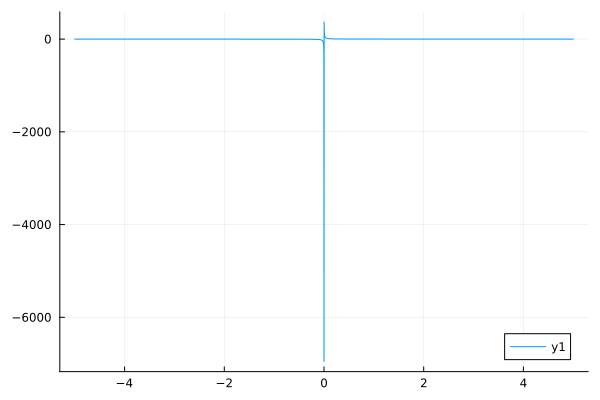

In [22]:
plot(x -> 1/x)

In [23]:
find_zero(x -> 1/x, (-1, 1), verbose=true)

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Bisection()
* iterations: 61
* function evaluations ≈ 64
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol

Trace:
(a₀, b₀) = ( -1, 0 )
(a₁, b₁) = ( -1.118751109680031e-154, 0 )
(a₂, b₂) = ( -1.1272010346794983e-231, 0 )
(a₃, b₃) = ( -3.5491565585003241e-270, 0 )
(a₄, b₄) = ( -1.988135013128901e-289, 0 )
(a₅, b₅) = ( -4.7036486372562232e-299, 0 )
(a₆, b₆) = ( -7.2341601287786131e-304, 0 )
(a₇, b₇) = ( -2.8369691695966818e-306, 0 )
(a₈, b₈) = ( -1.7765824089018436e-307, 0 )
(a₉, b₉) = ( -4.4458018696345059e-308, 0 )
(a₁₀, b₁₀) = ( -2.2229009348172529e-308, 0 )
(a₁₁, b₁₁) = ( -1.1114504674086265e-308, 0 )
(a₁₂, b₁₂) = ( -5.5572523370431324e-309, 0 )
(a₁₃, b₁₃) = ( -2.7786261685215662e-309, 0 )
(a₁₄, b₁₄) = ( -1.3893130842607831e-309, 0 )
(a₁₅, b₁₅) = ( -6.9465654213039155e-310, 0 )
(a₁₆, b₁₆) = ( -3.4732827106519577e-310, 0 )
(a₁₇, b₁₇) = ( -1.7366413553259789e-310, 0 )
(a₁₈, b₁₈) = ( -8.6832067766298943e-311, 0 

0.0

find_zeros - szukanie więcej niż jednego pierwiastka. Wykorzystuje podział przedziału na mniejsze podprzedziały

In [24]:
find_zeros(x ->(x-3)*x, -10, 10)

2-element Vector{Float64}:
 0.0
 3.0

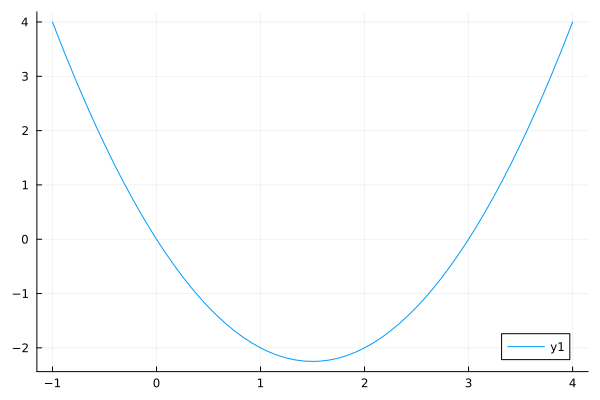

In [25]:
plot(x ->(x-3)*x,-1,4)

Więcej na https://docs.juliahub.com/Roots/o0Xsi/2.2.5/

### 4. Wyciąganie informacji z przebiegu działania funkcji: 

https://docs.juliahub.com/Roots/o0Xsi/2.2.5/reference/#Roots.Tracks 

In [26]:
tracker = Roots.Tracks()

Algorithm has not been run

In [27]:
find_zero(f, (0, 2), Roots.Secant(), tracks=tracker)

0.7390851332151607

In [28]:
tracker

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Secant()
* iterations: 7
* function evaluations ≈ 9
* stopped as f(x_n) = 0

Trace:
x₁ = 0,	 fx₁ = 1
x₂ = 2,	 fx₂ = -2.4161468365471426
x₃ = 0.58545492793321863,	 fx₃ = 0.24800586076647069
x₄ = 0.7171348682551959,	 fx₄ = 0.036556996479681581
x₅ = 0.73990076549012351,	 fx₅ = -0.0013652977662494958
x₆ = 0.73908113605420545,	 fx₆ = 6.6896907529034877e-06
x₇ = 0.73908513249559438,	 fx₇ = 1.2042747910001594e-09
x₈ = 0.73908513321516134,	 fx₈ = -1.1102230246251565e-15
x₉ = 0.73908513321516067,	 fx₉ = 0



In [29]:
tracker.steps

7

In [30]:
 tracker.fncalls

9

<b>WAŻNE: empty!(tracker) po każdym wywołaniu funkcji, inaczej zostają tam wyniki z poprzednich wywołań zakłamujące dane.</b>

### Zadanie:

A. Wybrać trzy metody poszukiwania pierwiastków: 

* wykorzystującą przedział i zmianę znaku, 
* wykorzystującą pochodną, 
* wykorzystującą przybliżenie pochodnej

    1. Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych  funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. <b>Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka !</b> (3 pkt)

    2. Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej. (1 pkt)

    3. Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym  przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny)(1 pkt)

B. Narysować <a href="https://pl.wikipedia.org/wiki/Wst%C4%99ga_Newtona"> wstegę Newtona </a> i objaśnić, w jaki sposób powstała i jaki jest jej związek z metodą Newtona do znajdowania pierwiastków. Sposób i język - dowolny. (1 pkt)

In [ ]:
using Colors, Plots
function newton_fractal(f, df; xlims=(-2, 2), ylims=(-2, 2), res=500, max_iter=30, tol=1e-6)
    xs = range(xlims[1], xlims[2], length=res)
    ys = range(ylims[1], ylims[2], length=res)
    img = zeros(RGB{Float64}, res, res)

    roots = Complex[]
    for i in 1:res, j in 1:res
        z = complex(xs[j], ys[i])
        for k in 1:max_iter
            dz = df(z)
            if abs(dz) < tol
                break
            end
            z_new = z - f(z) / dz
            if abs(z_new - z) < tol
                break
            end
            z = z_new
        end

        matched = false
        for (k, r) in enumerate(roots)
            if abs(z - r) < tol
                img[i, j] = RGB((k % 3) / 2, (k % 2), (k % 4) / 3)
                matched = true
                break
            end
        end
        if !matched
            push!(roots, z)
            k = length(roots)
            img[i, j] = RGB((k % 3) / 2, (k % 2), (k % 4) / 3)
        end
    end

    heatmap(xs, ys, img, axis=false, title="Wstęga Newtona")
end

# Przykład: wielomian z trzema pierwiastkami
f(z) = z^3 - 1
df(z) = 3z^2

newton_fractal(f, df)


f1(x) = x^3 - x - 2            # Pierwiastek około 1.521
df1(x) = 3x^2 - 1

f2(x) = exp(-x) - x            # Pierwiastek około 0.567
df2(x) = -exp(-x) - 1

f3(x) = x * cos(x) - sin(x)    # Pierwiastek około 0
df3(x) = cos(x) - x*sin(x) - cos(x)

f4(x) = sin(x) - 0.5           # Pierwiastek około π/6
df4(x) = cos(x)

f5(x) = log(x + 2) - x         # Pierwiastek około 0.158
df5(x) = 1 / (x + 2) - 1

f6(x) = x^5 - x^4 + x^3 - x^2 + x - 1
df6(x) = 5x^4 - 4x^3 + 3x^2 - 2x + 1


# Metoda bisekcji
function bisekcja(f, a, b; tol=1e-6, max_iter=100)
    if f(a) * f(b) >= 0
        error("Znaki f(a) i f(b) muszą być przeciwne")
    end
    
    iter = 0
    f_calls = 2  # Rozpoczynamy od f(a) i f(b)
    
    while (b - a) > tol && iter < max_iter
        c = (a + b) / 2
        fc = f(c)
        f_calls += 1
        
        if abs(fc) < tol
            return c, iter, f_calls, fc
        end
        
        if f(a) * fc < 0
            b = c
        else
            a = c
        end
        
        iter += 1
    end
    
    x = (a + b) / 2
    fx = f(x)
    f_calls += 1
    return x, iter, f_calls, fx
end

# Metoda Newtona
function newton(f, df, x0; tol=1e-6, max_iter=100)
    x = x0
    iter = 0
    f_calls = 0
    df_calls = 0
    
    while iter < max_iter
        fx = f(x)
        f_calls += 1
        
        if abs(fx) < tol
            return x, iter, f_calls + df_calls, fx
        end
        
        dfx = df(x)
        df_calls += 1
        
        if abs(dfx) < tol
            error("Pochodna bliska zeru")
        end
        
        x_new = x - fx / dfx
        
        if abs(x_new - x) < tol
            x = x_new
            fx = f(x)
            f_calls += 1
            return x, iter, f_calls + df_calls, fx
        end
        
        x = x_new
        iter += 1
    end
    
    error("Osiągnięto maksymalną liczbę iteracji")
end

# Metoda siecznych
function sieczne(f, a, b; tol=1e-6, max_iter=100)
    x0, x1 = a, b
    f0, f1 = f(x0), f(x1)
    f_calls = 2
    iter = 0
    
    while iter < max_iter
        if abs(f1) < tol
            return x1, iter, f_calls, f1
        end
        
        if abs(f1 - f0) < tol
            error("Metoda siecznych: dzielenie przez zero")
        end
        
        x = x1 - f1 * (x1 - x0) / (f1 - f0)
        
        if abs(x - x1) < tol
            fx = f(x)
            f_calls += 1
            return x, iter, f_calls, fx
        end
        
        x0, x1 = x1, x
        f0, f1 = f1, f(x)
        f_calls += 1
        iter += 1
    end
    
    error("Osiągnięto maksymalną liczbę iteracji")
end


function test_all()
    functions = [
        ("f1", f1, df1, 1.0, 2.0),
        ("f2", f2, df2, 0.0, 1.0),
        ("f3", f3, df3, -1.0, 1.0),
        ("f4", f4, df4, 0.0, 1.0),
        ("f5", f5, df5, 0.0, 1.0),
        ("f6", f6, df6, 0.0, 1.0)
    ]

    println("| Funkcja | Metoda | Iteracje | Wywołania | f(x*) |")
    println("|---------|--------|----------|------------|-------|")

    for (name, f, df, a, b) in functions
        try
            x, i, c, fx = bisekcja(f, a, b)
            println("| $name | Bisekcja | $i | $c | $(fx) |")
        catch e
            println("| $name | Bisekcja | Błąd | - | - |")
        end

        try
            x, i, c, fx = newton(f, df, (a + b) / 2)
            println("| $name | Newton | $i | $c | $(fx) |")
        catch e
            println("| $name | Newton | Błąd | - | - |")
        end

        try
            x, i, c, fx = sieczne(f, a, b)
            println("| $name | Sieczne | $i | $c | $(fx) |")
        catch e
            println("| $name | Sieczne | Błąd | - | - |")
        end
    end
end

test_all()

| Funkcja | Metoda | Iteracje | Wywołania | f(x*) |
|---------|--------|----------|------------|-------|
| f1 | Bisekcja | 20 | 23 | 1.4316080361176375e-6 |
| f1 | Newton | 2 | 5 | 5.893874259754739e-7 |
| f1 | Sieczne | 6 | 8 | 7.015477976324291e-9 |
| f2 | Bisekcja | 19 | 22 | -2.348157265297246e-7 |
| f2 | Newton | 2 | 5 | 1.964804717813351e-7 |
| f2 | Sieczne | 4 | 6 | -2.5380166635002865e-8 |
| f3 | Bisekcja | 0 | 3 | 0.0 |
| f3 | Newton | 0 | 1 | 0.0 |
| f3 | Sieczne | 1 | 3 | 0.0 |
| f4 | Bisekcja | 16 | 19 | -9.165263466504037e-7 |
| f4 | Newton | 2 | 5 | -5.95066923514409e-9 |
| f4 | Sieczne | 5 | 7 | -1.2430573237409703e-10 |
| f5 | Bisekcja | Błąd | - | - |
| f5 | Newton | 3 | 7 | -1.349875544676138e-9 |
| f5 | Sieczne | 3 | 5 | 2.1839122266165134e-7 |
| f6 | Bisekcja | Błąd | - | - |
| f6 | Newton | 7 | 15 | 1.9024888331387046e-9 |
| f6 | Sieczne | 0 | 2 | 0.0 |

In [ ]:
f_hard(x) = x^(1/3)
df_hard(x) = (1/3) * x^(-2/3)  # problem w 0


| Function | Method | Iterations | Calls | f(x*) |
|---------|--------|----------|------------|-------|
| f_hard | Bisekcja | 0 | 3 | 0.0 |
| f_hard | Newton | Błąd | - | - |
| f_hard | Sieczne | 1 | 3 | 0.0 |

In [ ]:
using Colors, Plots


function visualize_steps(f, df, a, b; tol=1e-6, max_iter=10, name="Function")
    # Zmodyfikowane wersje algorytmów zapisujące pośrednie kroki
    
    # Bisekcja z zapisem kroków
    function bisekcja_steps(f, a, b; tol=tol, max_iter=max_iter)
        if f(a) * f(b) >= 0
            error("Znaki f(a) i f(b) muszą być przeciwne")
        end
        
        steps = [(a, b)]
        iter = 0
        
        while (b - a) > tol && iter < max_iter
            c = (a + b) / 2
            fc = f(c)
            
            if abs(fc) < tol
                push!(steps, (c, c))
                return steps
            end
            
            if f(a) * fc < 0
                b = c
            else
                a = c
            end
            
            push!(steps, (a, b))
            iter += 1
        end
        
        return steps
    end
    
    # Newton z zapisem kroków
    function newton_steps(f, df, x0; tol=tol, max_iter=max_iter)
        x = x0
        steps = [x]
        
        for iter in 1:max_iter
            fx = f(x)
            if abs(fx) < tol
                return steps
            end
            
            dfx = df(x)
            if abs(dfx) < tol
                return steps
            end
            
            x_new = x - fx / dfx
            push!(steps, x_new)
            
            if abs(x_new - x) < tol
                return steps
            end
            
            x = x_new
        end
        
        return steps
    end
    
    # Sieczne z zapisem kroków
    function sieczne_steps(f, a, b; tol=tol, max_iter=max_iter)
        x0, x1 = a, b
        steps = [x0, x1]
        
        for iter in 1:max_iter
            f0, f1 = f(x0), f(x1)
            
            if abs(f1) < tol
                return steps
            end
            
            if abs(f1 - f0) < tol
                return steps
            end
            
            x = x1 - f1 * (x1 - x0) / (f1 - f0)
            push!(steps, x)
            
            if abs(x - x1) < tol
                return steps
            end
            
            x0, x1 = x1, x
        end
        
        return steps
    end
    
    # Zbierz kroki dla każdej metody
    bisection_steps = bisekcja_steps(f, a, b)
    newton_steps = newton_steps(f, df, (a + b) / 2)
    secant_steps = sieczne_steps(f, a, b)
    
    # Przygotuj wartości x do wykresu funkcji
    x_vals = range(a, b, length=500)
    y_vals = f.(x_vals)
    
    # Stwórz wykresy dla każdej metody
    bisection_plot = plot(x_vals, y_vals, label="f(x)", title="Metoda bisekcji", 
                          xlabel="x", ylabel="f(x)", legend=:topright)
    plot!(bisection_plot, [a, b], [0, 0], color=:black, linestyle=:dash, label="oś x")
    
    newton_plot = plot(x_vals, y_vals, label="f(x)", title="Metoda Newtona", 
                      xlabel="x", ylabel="f(x)", legend=:topright)
    plot!(newton_plot, [a, b], [0, 0], color=:black, linestyle=:dash, label="oś x")
    
    secant_plot = plot(x_vals, y_vals, label="f(x)", title="Metoda siecznych", 
                      xlabel="x", ylabel="f(x)", legend=:topright)
    plot!(secant_plot, [a, b], [0, 0], color=:black, linestyle=:dash, label="oś x")
    
    # Narysuj kroki dla metody bisekcji
    for (i, (left, right)) in enumerate(bisection_steps)
        mid = (left + right) / 2
        scatter!(bisection_plot, [left], [0], color=:red, label=i==1 ? "lewy brzeg" : "")
        scatter!(bisection_plot, [right], [0], color=:blue, label=i==1 ? "prawy brzeg" : "")
        scatter!(bisection_plot, [mid], [f(mid)], color=:green, label=i==1 ? "środek" : "")
        annotate!(bisection_plot, mid, f(mid), text(string(i), 8, :black))
    end
    
    # Narysuj kroki dla metody Newtona
    for (i, x) in enumerate(newton_steps)
        fx = f(x)
        scatter!(newton_plot, [x], [fx], color=:green, label=i==1 ? "iteracje" : "")
        annotate!(newton_plot, x, fx, text(string(i), 8, :black))
        
        if i < length(newton_steps)
            # Narysuj styczną
            dfx = df(x)
            x_next = newton_steps[i+1]
            x_line = [x - 0.1*(b-a), x + 0.1*(b-a)]
            y_line = [fx - 0.1*(b-a)*dfx, fx + 0.1*(b-a)*dfx]
            plot!(newton_plot, x_line, y_line, color=:red, label=i==1 ? "styczna" : "")
            
            # Narysuj linię do osi x
            plot!(newton_plot, [x_next, x_next], [0, f(x_next)], 
                  color=:blue, linestyle=:dash, label=i==1 ? "następny punkt" : "")
        end
    end
    
    # Narysuj kroki dla metody siecznych
    for (i, x) in enumerate(secant_steps)
        fx = f(x)
        scatter!(secant_plot, [x], [fx], color=:green, label=i==1 ? "iteracje" : "")
        annotate!(secant_plot, x, fx, text(string(i), 8, :black))
        
        if i < length(secant_steps) - 1
            # Narysuj sieczną
            x1, x2 = secant_steps[i], secant_steps[i+1]
            f1, f2 = f(x1), f(x2)
            plot!(secant_plot, [x1, x2], [f1, f2], color=:red, label=i==1 ? "sieczna" : "")
            
            # Narysuj linię do osi x dla następnego punktu
            if i + 2 <= length(secant_steps)
                x_next = secant_steps[i+2]
                plot!(secant_plot, [x_next, x_next], [0, f(x_next)], 
                      color=:blue, linestyle=:dash, label=i==1 ? "następny punkt" : "")
            end
        end
    end
    
    # Połącz wykresy
    plot(bisection_plot, newton_plot, secant_plot, layout=(3,1), size=(800, 1200), 
         title="Znajdowanie pierwiastków dla funkcji $name")
    savefig("fractal_vis.png")
end


f1(x) = x^3 - x - 2            # Pierwiastek około 1.521
df1(x) = 3x^2 - 1


# Przykład 1: Funkcja f1 (x^3 - x - 2)
visualize_steps(f1, df1, 1.0, 2.0, max_iter=8, name="x^3 - x - 2")


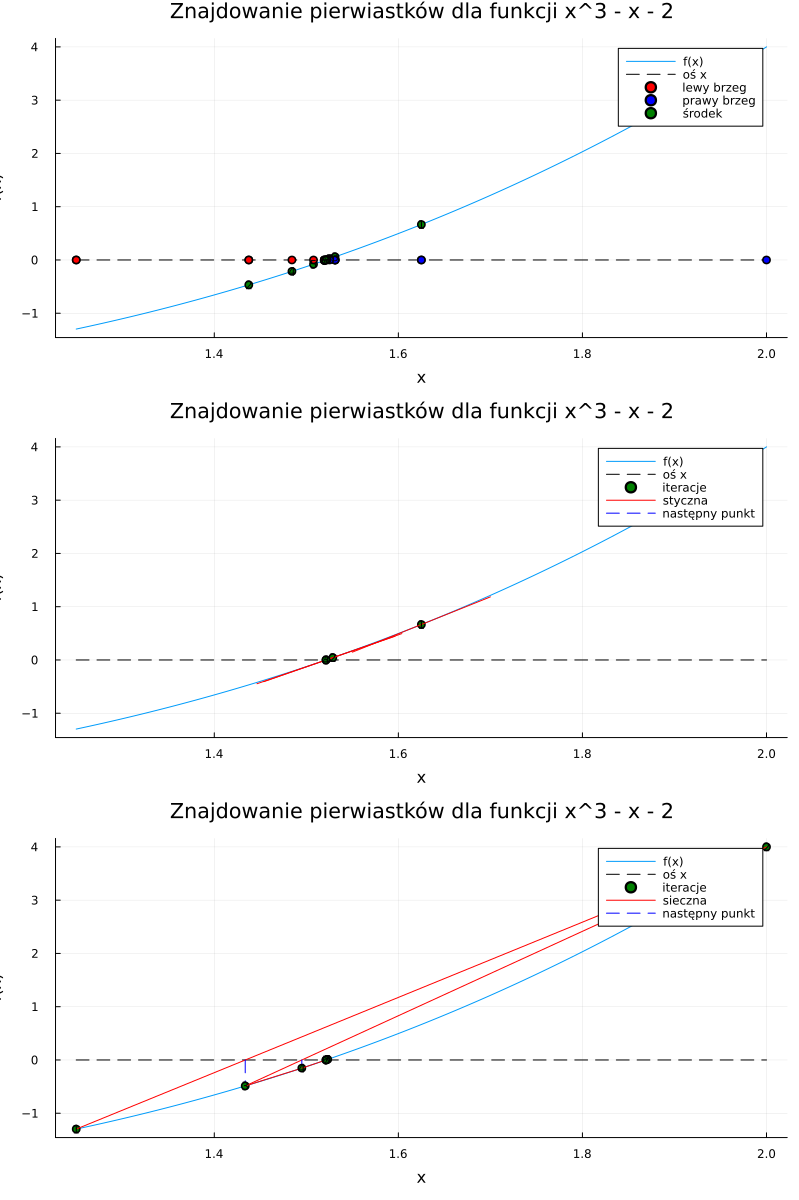
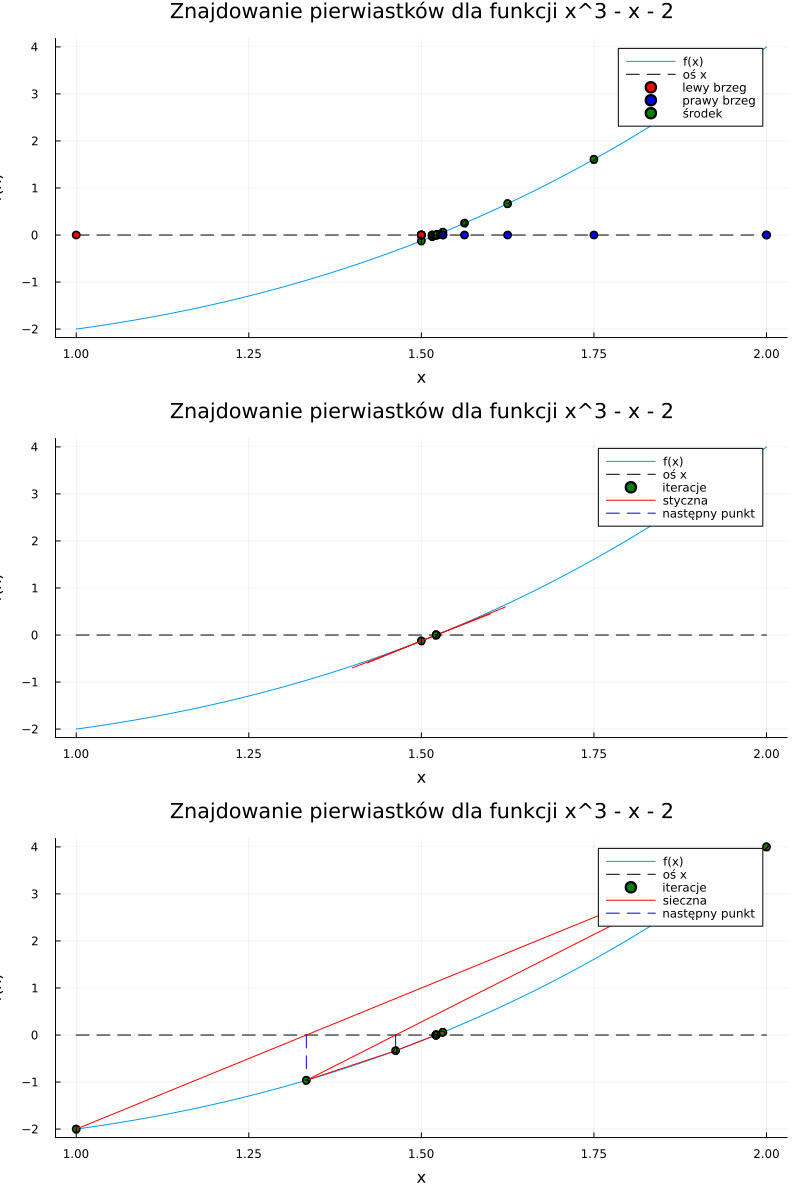

In [ ]:
using Colors, Plots

function newton_fractal(f, df; xlims=(-2, 2), ylims=(-2, 2), res=500, max_iter=30, tol=1e-6)
    xs = range(xlims[1], xlims[2], length=res)
    ys = range(ylims[1], ylims[2], length=res)
    img = zeros(RGB{Float64}, res, res)

    roots = Complex[]
    for i in 1:res, j in 1:res
        z = complex(xs[j], ys[i])
        for k in 1:max_iter
            dz = df(z)
            if abs(dz) < tol
                break
            end
            z_new = z - f(z) / dz
            if abs(z_new - z) < tol
                break
            end
            z = z_new
        end

        matched = false
        for (k, r) in enumerate(roots)
            if abs(z - r) < tol
                img[i, j] = RGB((k % 3) / 2, (k % 2), (k % 4) / 3)
                matched = true
                break
            end
        end
        if !matched
            push!(roots, z)
            k = length(roots)
            img[i, j] = RGB((k % 3) / 2, (k % 2), (k % 4) / 3)
        end
    end

    heatmap(xs, ys, img, axis=false, title="Wstęga Newtona")
    savefig("newton_fractal.png")
end

# Przykład: wielomian z trzema pierwiastkami
f(z) = z^3 - 1
df(z) = 3z^2

newton_fractal(f, df)


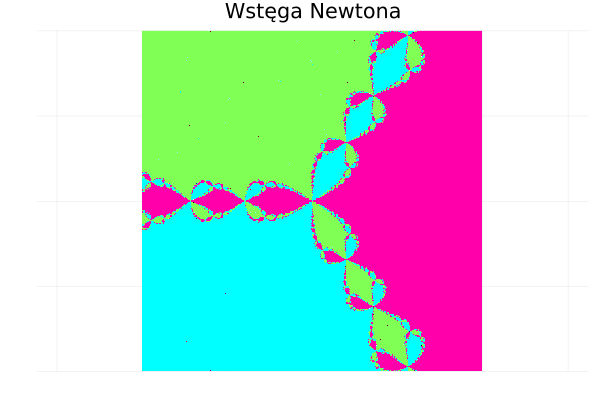

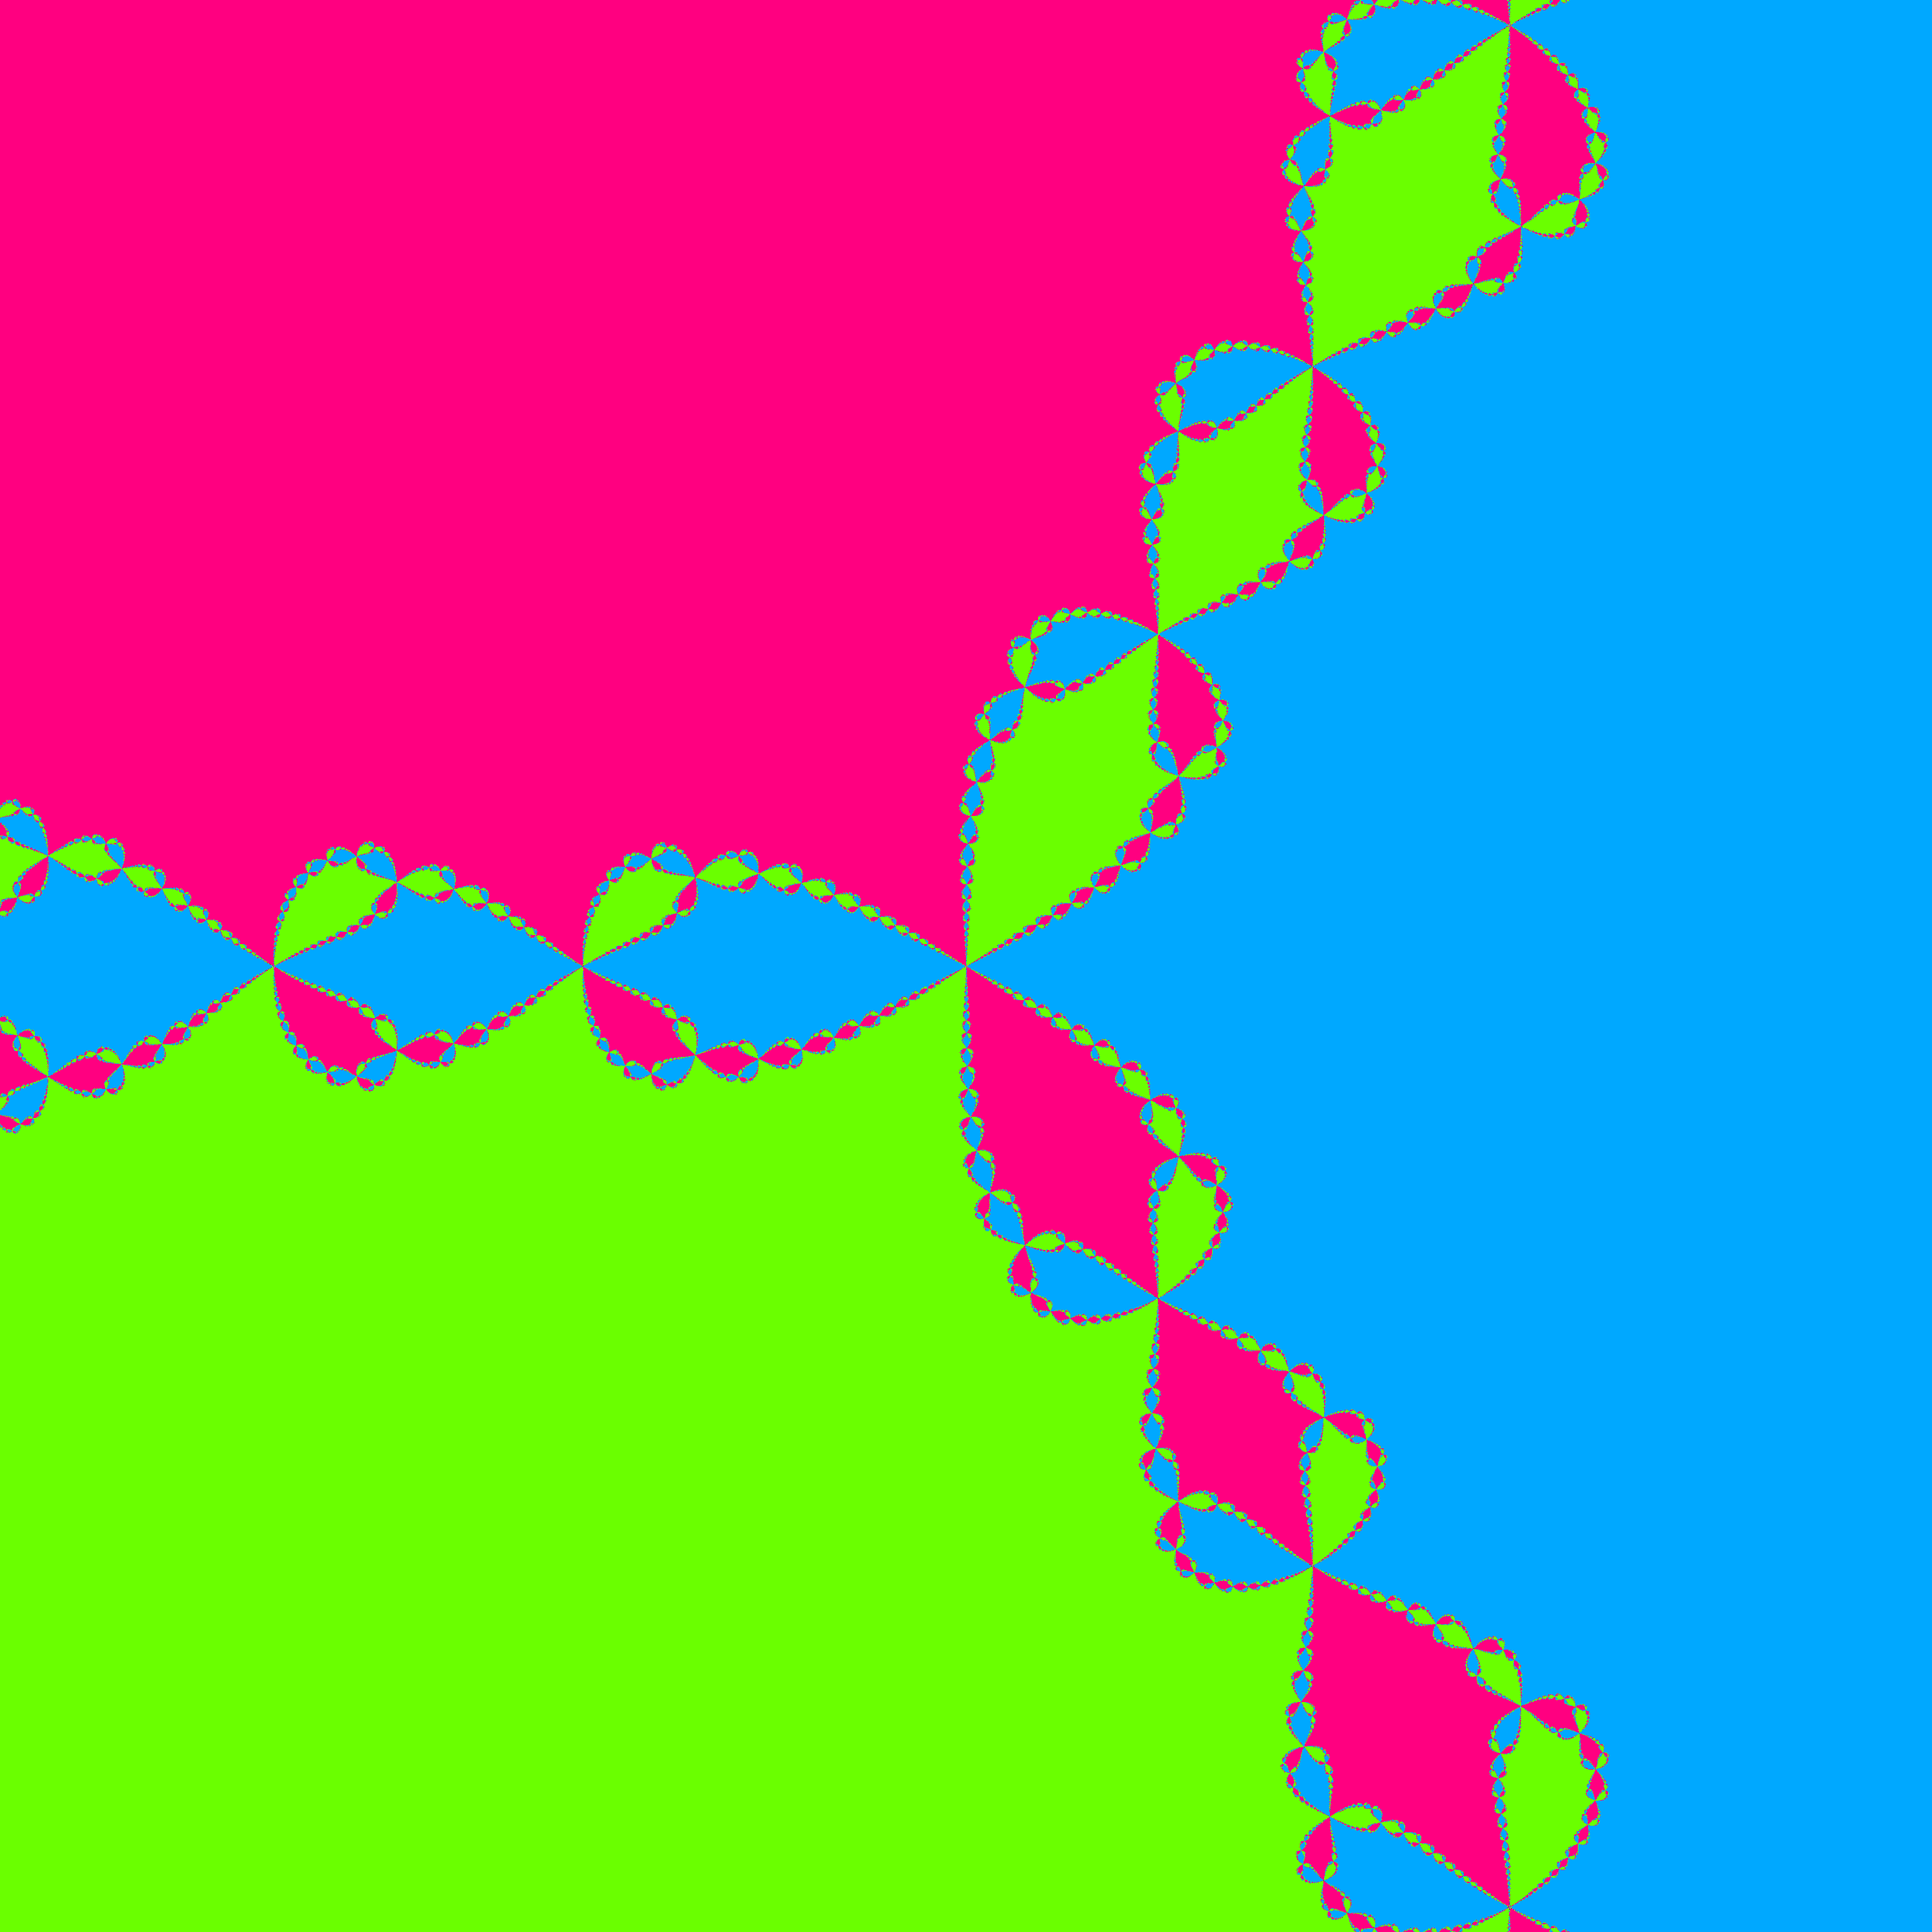
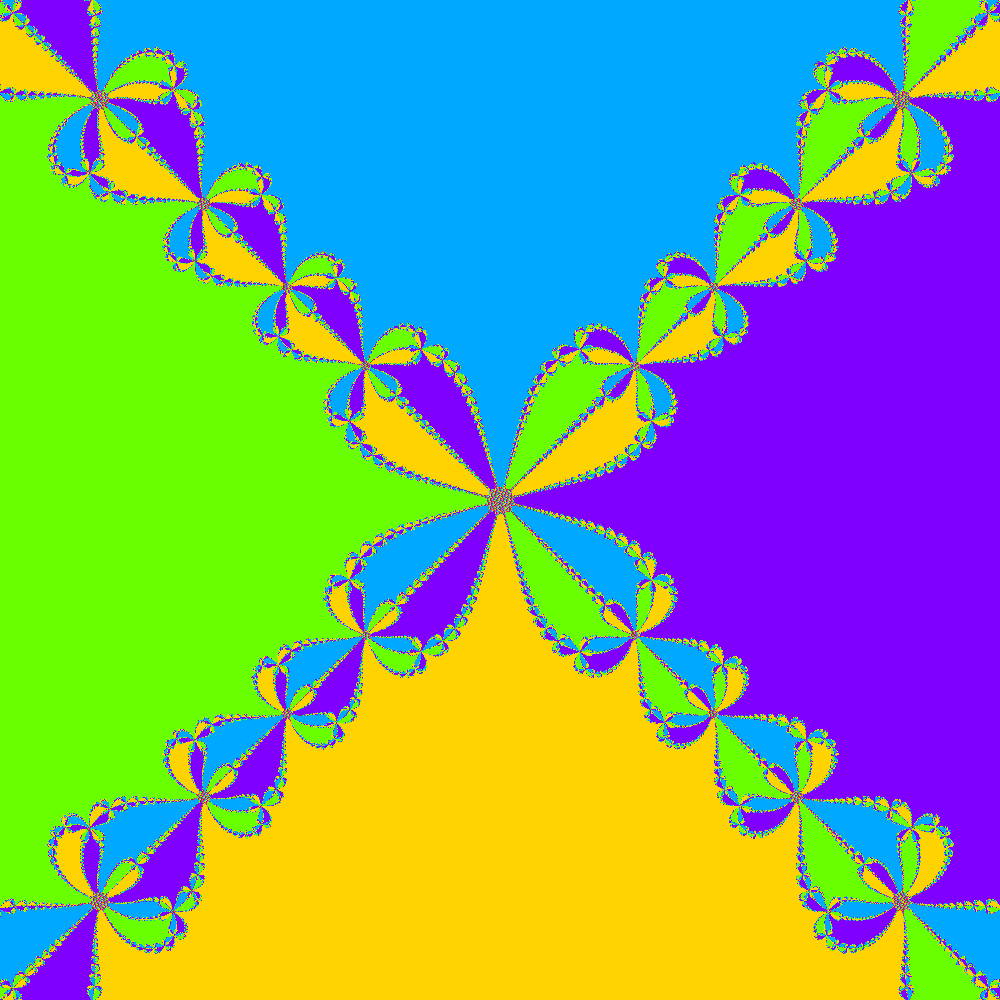
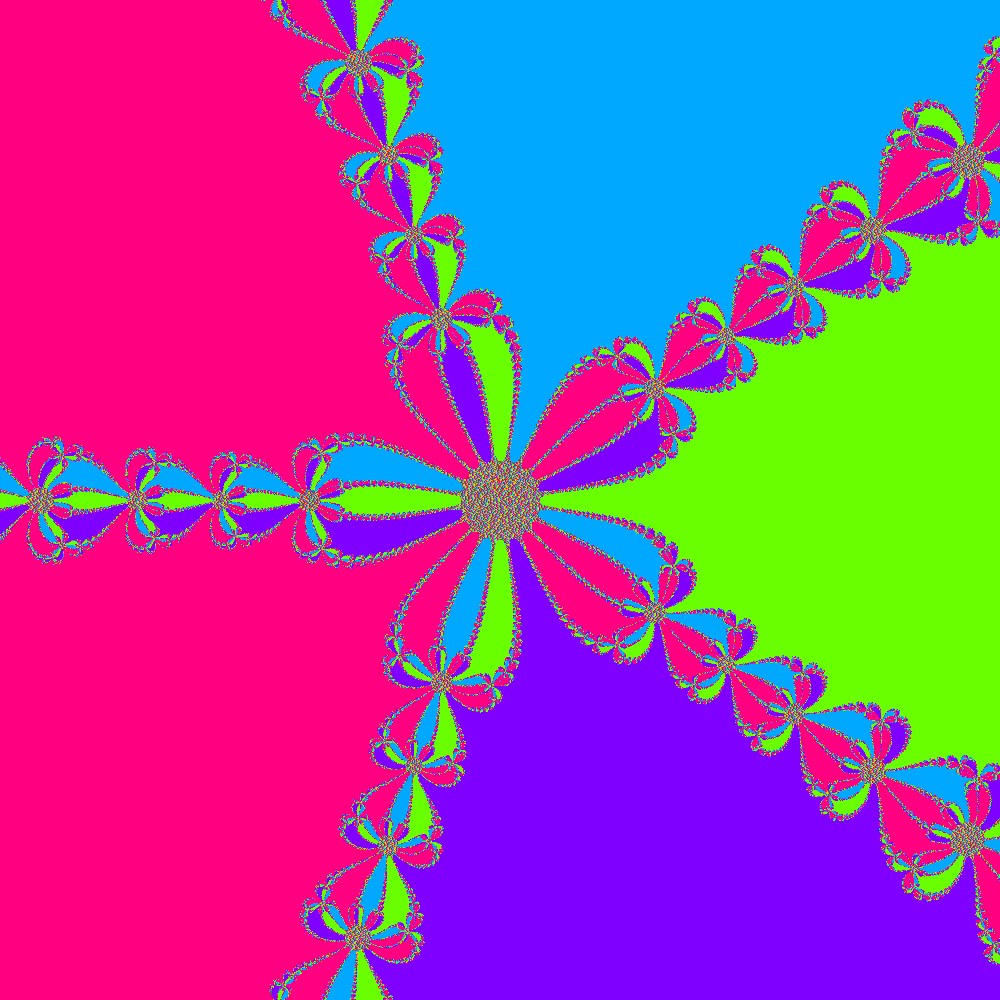

**Opis:**

Wstęga Newtona to wizualizacja działania metody Newtona w przestrzeni zespolonej. Dla danego wielomianu (lub innej funkcji zespolonej) metoda Newtona iteracyjnie przybliża pierwiastki funkcji, zaczynając od różnych punktów startowych w płaszczyźnie zespolonej. 

Każdy punkt na płaszczyźnie jest przypisany do pierwiastka, do którego zbiega metoda Newtona, a kolor punktu reprezentuje ten pierwiastek. Różne kolory oznaczają różne pierwiastki.

Granice między obszarami o różnych kolorach są szczególnie interesujące, ponieważ wskazują punkty, dla których metoda Newtona jest niestabilna lub zbieżność jest trudna do osiągnięcia. Te granice tworzą charakterystyczne fraktalne wzory.

Wstęga Newtona pokazuje, jak metoda Newtona działa w praktyce, i ilustruje jej związek z pierwiastkami funkcji. Jest to również przykład fraktala, co podkreśla złożoność i piękno matematyki w zastosowaniach numerycznych.